In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import collections
import random
from matplotlib.pyplot import imshow
from PIL import Image

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from keras import layers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model

import keras.backend as K
from keras.models import Sequential

G:\conda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
os.listdir('G:/kaggle/scene_classification')

['sample_submission_CH2mq5Z.csv',
 'submission.csv',
 'submission1.csv',
 'test_WyRytb0.csv',
 'train',
 'train.csv']

In [2]:
train_df=pd.read_csv('G:/kaggle/scene_classification/train.csv')
train_df.head()

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


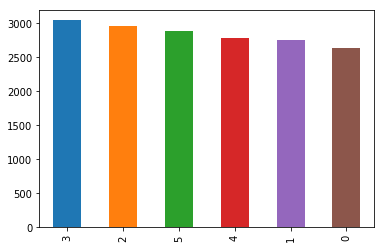

In [4]:
train_df['label'].value_counts().plot.bar()

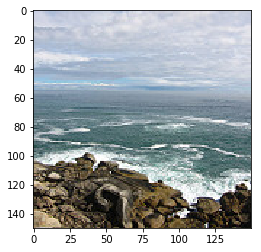

In [5]:
sampleImageFilename = "G:/kaggle/scene_classification/train/7.jpg"
sampleImage = mpimg.imread(sampleImageFilename)
plt.imshow(sampleImage)

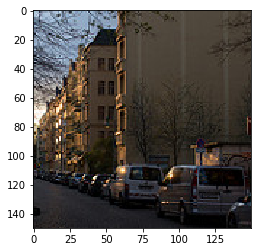

In [6]:
sampleImageFilename = "G:/kaggle/scene_classification/train/2.jpg"
sampleImage = mpimg.imread(sampleImageFilename)
plt.imshow(sampleImage)

In [3]:
def prepareImages(data, m, dataset):
    print("Preparing images")
    X_train = np.zeros((m, 100, 100, 3))
    count = 0
    
    for fig in data['image_name']:
        #load images into images of size 100x100x3
        img = image.load_img("G:/kaggle/scene_classification/"+dataset+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        X_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return X_train

In [4]:
X = prepareImages(train_df, train_df.shape[0], "train")
X /= 255

Preparing images
Processing image:  1 ,  0.jpg
Processing image:  501 ,  724.jpg
Processing image:  1001 ,  1445.jpg
Processing image:  1501 ,  2136.jpg
Processing image:  2001 ,  2857.jpg
Processing image:  2501 ,  3535.jpg
Processing image:  3001 ,  4266.jpg
Processing image:  3501 ,  5053.jpg
Processing image:  4001 ,  5731.jpg
Processing image:  4501 ,  6434.jpg
Processing image:  5001 ,  7139.jpg
Processing image:  5501 ,  7860.jpg
Processing image:  6001 ,  8591.jpg
Processing image:  6501 ,  9311.jpg
Processing image:  7001 ,  10025.jpg
Processing image:  7501 ,  10716.jpg
Processing image:  8001 ,  11409.jpg
Processing image:  8501 ,  12118.jpg
Processing image:  9001 ,  12790.jpg
Processing image:  9501 ,  13548.jpg
Processing image:  10001 ,  14259.jpg
Processing image:  10501 ,  14979.jpg
Processing image:  11001 ,  15674.jpg
Processing image:  11501 ,  16388.jpg
Processing image:  12001 ,  17122.jpg
Processing image:  12501 ,  17855.jpg
Processing image:  13001 ,  18552.jpg

In [5]:
def prepare_labels(y):
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    # print(integer_encoded)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    # print(onehot_encoded)

    y = onehot_encoded
    # print(y.shape)
    return y, label_encoder

In [6]:
y, label_encoder = prepare_labels(train_df['label'])

In [7]:
y.shape

(17034, 6)

In [9]:
cnn = Sequential()
cnn.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (100,100,3)))
cnn.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
cnn.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
cnn.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512, activation = 'relu'))
cnn.add(BatchNormalization())
cnn.add(Dense(y.shape[1], activation = "softmax"))

In [50]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
__________

In [14]:
cnn.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [15]:
history1 = cnn.fit(X, y, epochs=10,validation_split=0.2, batch_size=75)

Train on 13627 samples, validate on 3407 samples
Epoch 1/10
13627/13627 [==============================] - 6046s 444ms/step - loss: 0.9214 - acc: 0.6480 - val_loss: 0.9033 - val_acc: 0.6695
Epoch 2/10
13627/13627 [==============================] - ETA: 13s - loss: 0.6543 - acc: 0.76 - 3893s 286ms/step - loss: 0.6540 - acc: 0.7658 - val_loss: 0.6581 - val_acc: 0.7605
Epoch 3/10
13627/13627 [==============================] - 4211s 309ms/step - loss: 0.5536 - acc: 0.7968 - val_loss: 0.6325 - val_acc: 0.7898
Epoch 4/10
13627/13627 [==============================] - 3944s 289ms/step - loss: 0.4969 - acc: 0.8207 - val_loss: 0.5548 - val_acc: 0.8069
Epoch 5/10
13627/13627 [==============================] - 3905s 287ms/step - loss: 0.4389 - acc: 0.8419 - val_loss: 0.5680 - val_acc: 0.8104
Epoch 6/10
13627/13627 [==============================] - ETA: 13s - loss: 0.4042 - acc: 0.85 - 4012s 294ms/step - loss: 0.4042 - acc: 0.8534 - val_loss: 0.5404 - val_acc: 0.8136
Epoch 7/10
13627/13627 [=====

In [16]:
cnn.save("CNN2.h5")

In [8]:
# transfer learning 
from keras.applications import VGG16
conv_base=VGG16(weights='imagenet',
               include_top=False,
               input_shape=(100,100,3))

In [9]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [10]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(y.shape[1],activation='sigmoid'))

In [11]:
conv_base.trainable=False

In [13]:
model.compile(optimizer ='RMSProp' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [14]:
history2 = model.fit(X, y, epochs=10,validation_split=0.2, batch_size=75)

Train on 13627 samples, validate on 3407 samples
Epoch 1/10
13627/13627 [==============================] - 6687s 491ms/step - loss: 0.6195 - acc: 0.7578 - val_loss: 0.5244 - val_acc: 0.8139
Epoch 2/10
13627/13627 [==============================] - 5350s 393ms/step - loss: 0.3906 - acc: 0.8574 - val_loss: 0.3663 - val_acc: 0.8697
Epoch 3/10
13627/13627 [==============================] - 5196s 381ms/step - loss: 0.3215 - acc: 0.8758 - val_loss: 0.3566 - val_acc: 0.8800
Epoch 4/10
13627/13627 [==============================] - 5291s 388ms/step - loss: 0.2877 - acc: 0.8921 - val_loss: 0.4024 - val_acc: 0.8647
Epoch 5/10
13627/13627 [==============================] - 5136s 377ms/step - loss: 0.2500 - acc: 0.9058 - val_loss: 0.3894 - val_acc: 0.8717
Epoch 6/10
13627/13627 [==============================] - 5112s 375ms/step - loss: 0.2290 - acc: 0.9121 - val_loss: 0.4838 - val_acc: 0.8532
Epoch 7/10
13627/13627 [==============================] - 5331s 391ms/step - loss: 0.1980 - acc: 0.9240 -

In [43]:
submit_df=pd.read_csv("G:/kaggle/scene_classification/sample_submission_CH2mq5Z.csv")
submit_df.head()

,image_name,label
0,3.jpg,0
1,5.jpg,0
2,6.jpg,0
3,11.jpg,0
4,14.jpg,0


In [15]:
test_df=pd.read_csv("G:/kaggle/scene_classification/test_WyRytb0.csv")
test_df.shape

(7301, 1)

In [16]:
x = prepareImages(test_df, test_df.shape[0], "train")
x /= 255

Preparing images
Processing image:  1 ,  3.jpg
Processing image:  501 ,  1664.jpg
Processing image:  1001 ,  3413.jpg
Processing image:  1501 ,  4837.jpg
Processing image:  2001 ,  6650.jpg
Processing image:  2501 ,  8284.jpg
Processing image:  3001 ,  9945.jpg
Processing image:  3501 ,  11730.jpg
Processing image:  4001 ,  13416.jpg
Processing image:  4501 ,  15041.jpg
Processing image:  5001 ,  16751.jpg
Processing image:  5501 ,  18365.jpg
Processing image:  6001 ,  20009.jpg
Processing image:  6501 ,  21626.jpg
Processing image:  7001 ,  23350.jpg


In [18]:
predictions =model.predict(np.array(x),verbose=1)

7301/7301 [==============================] - 2524s 346ms/step


In [19]:
image_name=np.arange(test_df.shape[0])+1

In [20]:
sub={'image_name':image_name,
    'label':np.argmax(predictions,axis=1)}

In [21]:
df=pd.DataFrame(sub,columns=['image_name','label'])
df.head()

,image_name,label
0,1,5
1,2,0
2,3,4
3,4,2
4,5,5


In [22]:
df.shape

(7301, 2)

In [23]:
df.to_csv('submission3.csv',index=False)